CS571 : Assignment 7 (Linear Regression)


Group Members Roll No.s : 2001CS35,2001CS56,2001CS70

In [211]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Step 1: Processing dataset

In [212]:
# Load the dataset from TSV
file_path = './newspaper.csv'
df = pd.read_csv(file_path ,header=0)
df

,SNo,Newspaper,Daily,Sunday
0,0,Baltimore Sun,391.952,488.506
1,1,Boston Globe,516.981,798.298
2,2,Boston Herald,355.628,235.084
3,3,Charlotte Observer,238.555,299.451
4,4,Chicago Sun Times,537.780,559.093
5,5,Chicago Tribune,733.775,1133.249
6,6,Cincinnati Enquirer,198.832,348.744
7,7,Denver Post,252.624,417.779
8,8,Des Moines Register,206.204,344.522
9,9,Hartford Courant,231.177,323.084


Step 2: Data Analysis

In [213]:
min_daily_sales = df['Daily'].min()
max_daily_sales = df['Daily'].max()
avg_daily_sales = df['Daily'].mean()

print("Min Daily Sales: " ,min_daily_sales)
print("Max Daily Sales: " ,max_daily_sales)
print("Avg Daily Sales: " ,avg_daily_sales)

thres_min_daily_sales =  min_daily_sales * 1.3
thres_max_daily_sales = max_daily_sales * 1.3
thres_avg_daily_sales = avg_daily_sales * 1.3


print("\nMin Daily Sales Threshold: " ,thres_min_daily_sales)
print("Max Daily Sales Threshold: " ,thres_max_daily_sales)
print("Avg Daily Sales Threshold: " ,thres_avg_daily_sales)


Min Daily Sales:  133.239
Max Daily Sales:  1209.225
Avg Daily Sales:  430.9624705882353

Min Daily Sales Threshold:  173.2107
Max Daily Sales Threshold:  1571.9924999999998
Avg Daily Sales Threshold:  560.2512117647059


Step 3: Estimate coefficient

In [214]:
# number of observations/points
x=df['Daily']
y=df['Sunday ']
n = np.size(x)

# mean of x and y vector
m_x = np.mean(x)
m_y = np.mean(y)

# calculating cross-deviation and deviation about x
SS_xy = np.sum(y*x) - n*m_y*m_x
SS_xx = np.sum(x*x) - n*m_x*m_x

# calculating regression coefficients
b_1 = SS_xy / SS_xx
b_0 = m_y - b_1*m_x


b=[b_0,b_1]
b


[13.83562990963594, 1.3397147576841262]

Step 4: Plot Graph

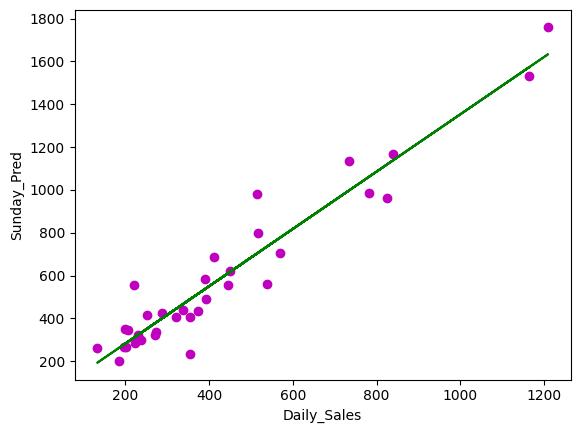

In [215]:
# plotting the actual points as scatter plot
plt.scatter(x, y, color = "m",marker = "o")

# predicted response vector
y_pred = b[0] + b[1]*x

# plotting the regression line
plt.plot(x, y_pred, color = "g")

# putting labels
plt.xlabel('Daily_Sales')
plt.ylabel('Sunday_Pred')

# function to show plot
plt.show()



In [216]:
df['Sunday_Pred'] = y_pred
df

,SNo,Newspaper,Daily,Sunday,Sunday_Pred
0,0,Baltimore Sun,391.952,488.506,538.939509
1,1,Boston Globe,516.981,798.298,706.442705
2,2,Boston Herald,355.628,235.084,490.275710
3,3,Charlotte Observer,238.555,299.451,333.431284
4,4,Chicago Sun Times,537.780,559.093,734.307432
5,5,Chicago Tribune,733.775,1133.249,996.884826
6,6,Cincinnati Enquirer,198.832,348.744,280.213795
7,7,Denver Post,252.624,417.779,352.279731
8,8,Des Moines Register,206.204,344.522,290.090172
9,9,Hartford Courant,231.177,323.084,323.546868


Step 5: Check which Newspaper should stop Sunday circulation

In [217]:
df['Stop_Sunday_Min'] = np.where(df['Sunday_Pred'] > thres_min_daily_sales,'Yes','No')
df['Stop_Sunday_Max'] = np.where(df['Sunday_Pred'] > thres_max_daily_sales,'Yes','No')
df['Stop_Sunday_Avg'] = np.where(df['Sunday_Pred'] > thres_avg_daily_sales,'Yes','No')

df

,SNo,Newspaper,Daily,Sunday,Sunday_Pred,Stop_Sunday_Min,Stop_Sunday_Max,Stop_Sunday_Avg
0,0,Baltimore Sun,391.952,488.506,538.939509,Yes,No,No
1,1,Boston Globe,516.981,798.298,706.442705,Yes,No,Yes
2,2,Boston Herald,355.628,235.084,490.275710,Yes,No,No
3,3,Charlotte Observer,238.555,299.451,333.431284,Yes,No,No
4,4,Chicago Sun Times,537.780,559.093,734.307432,Yes,No,Yes
5,5,Chicago Tribune,733.775,1133.249,996.884826,Yes,No,Yes
6,6,Cincinnati Enquirer,198.832,348.744,280.213795,Yes,No,No
7,7,Denver Post,252.624,417.779,352.279731,Yes,No,No
8,8,Des Moines Register,206.204,344.522,290.090172,Yes,No,No
9,9,Hartford Courant,231.177,323.084,323.546868,Yes,No,No


In [218]:
print("Stop Sunday Edition (In case of Avg):")

no_sunday_edition_avg = df[df['Stop_Sunday_Avg'] == 'No']
no_sunday_edition_avg['Newspaper']

Stop Sunday Edition (In case of Avg):


0                      Baltimore Sun
2                      Boston Herald
3                 Charlotte Observer
6                Cincinnati Enquirer
7                        Denver Post
8                Des Moines Register
9                   Hartford Courant
11                  Kansas City Star
12            Los Angeles Daily News
16        New Orleans Times-Picayune
20                Omaha World Herald
21            Orange County Register
23                  Pittsburgh Press
24                Portland Oregonian
25       Providence Journal-Bulletin
26    Rochester Democrat & Chronicle
27               Rocky Mountain News
28                    Sacramento Bee
30           St. Louis Post-Dispatch
31            St. Paul Pioneer Press
32                     Tampa Tribune
Name: Newspaper, dtype: object

Step 6: Desired result

In [219]:
print("Stop Sunday Edition (In case of Min):")

no_sunday_edition_min = df[df['Stop_Sunday_Min'] == 'No']
no_sunday_edition_min['Newspaper']

Stop Sunday Edition (In case of Min):


Series([], Name: Newspaper, dtype: object)

In [220]:
print("Stop Sunday Edition (In case of Max):")

no_sunday_edition_max = df[df['Stop_Sunday_Max'] == 'No']
no_sunday_edition_max['Newspaper']

Stop Sunday Edition (In case of Max):


0                      Baltimore Sun
1                       Boston Globe
2                      Boston Herald
3                 Charlotte Observer
4                  Chicago Sun Times
5                    Chicago Tribune
6                Cincinnati Enquirer
7                        Denver Post
8                Des Moines Register
9                   Hartford Courant
10                 Houston Chronicle
11                  Kansas City Star
12            Los Angeles Daily News
14                      Miami Herald
15          Minneapolis Star Tribune
16        New Orleans Times-Picayune
17               New York Daily News
19                           Newsday
20                Omaha World Herald
21            Orange County Register
22             Philadelphia Inquirer
23                  Pittsburgh Press
24                Portland Oregonian
25       Providence Journal-Bulletin
26    Rochester Democrat & Chronicle
27               Rocky Mountain News
28                    Sacramento Bee
2